In [1]:
# --- Stage 3: Exploratory Run Data Analysis & Quality Visualization ---
#This stage explores the cleaned Strava running dataset produced in Stage 2.
#Inspecting overall structure and descriptive statistics
#Visualizing distributions of distance, pace, and cadence
#Checking residual missingness or anomalies
#Validating per-run summaries before deeper modeling or clustering

In [2]:
# 3.0. Import libaries and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load data
data_path = Path("../data/strava/processed/strava_runs.parquet")
df = pd.read_parquet(data_path)
print(f"✅ Loaded {len(df):,} rows × {len(df.columns)} columns")


✅ Loaded 600,047 rows × 26 columns


In [3]:
# --- 3.1. Basic summary ---
display(df.head())
display(df.info())
display(df.describe(include='all').T)


,timestamp,position_lat,position_long,distance,enhanced_altitude,altitude,enhanced_speed,speed,unknown_61,unknown_66,...,run_id,heart_rate,power,vertical_oscillation,stance_time_percent,stance_time,vertical_ratio,stance_time_balance,step_length,activity_type
0,2023-06-25 14:27:27,664554377.0,149690629.0,2.97,7.2,7.2,1.185,1.185,2685.0,717.0,...,10011163869.fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2023-06-25 14:27:33,664555982.0,149692475.0,20.80,7.4,7.4,2.043,2.043,2685.0,716.0,...,10011163869.fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2023-06-25 14:27:39,664557533.0,149694080.0,37.57,7.6,7.6,2.183,2.183,2686.0,716.0,...,10011163869.fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2023-06-25 14:27:45,664558925.0,149695626.0,52.91,7.6,7.6,2.267,2.267,2686.0,716.0,...,10011163869.fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2023-06-25 14:27:51,664560373.0,149697578.0,69.82,7.6,7.6,2.417,2.417,2686.0,716.0,...,10011163869.fit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600047 entries, 0 to 600046
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   timestamp             600047 non-null  datetime64[ns]
 1   position_lat          561198 non-null  float64       
 2   position_long         561198 non-null  float64       
 3   distance              600047 non-null  float64       
 4   enhanced_altitude     579695 non-null  float64       
 5   altitude              579695 non-null  float64       
 6   enhanced_speed        432633 non-null  float64       
 7   speed                 432633 non-null  float64       
 8   unknown_61            423353 non-null  float64       
 9   unknown_66            423353 non-null  float64       
 10  cadence               430449 non-null  float64       
 11  fractional_cadence    410100 non-null  float64       
 12  distance_km           600047 non-null  float64       
 13 

None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
timestamp,600047,NaN,NaN,NaN,2020-07-25 03:59:25.475372544,2014-09-29 18:37:40,2015-06-13 13:58:56.500000,2021-09-28 17:29:28,2022-10-09 17:28:12,2025-09-15 21:03:15,NaN
position_lat,561198.0,NaN,NaN,NaN,664293518.262225,414196740.0,664422417.75,664672661.5,665133065.75,815549564.0,30009800.281505
position_long,561198.0,NaN,NaN,NaN,159195733.291272,57855245.0,148536294.5,149391873.0,149637541.0,1667407536.0,130295508.15049
distance,600047.0,NaN,NaN,NaN,6179.145217,0.0,2195.155,5328.84,8976.055,40796.13,4946.05801
enhanced_altitude,579695.0,NaN,NaN,NaN,18.471532,-334.2,-1.4,7.0,16.6,825.6,81.296235
altitude,579695.0,NaN,NaN,NaN,18.471532,-334.2,-1.4,7.0,16.6,825.6,81.296235
enhanced_speed,432633.0,NaN,NaN,NaN,3.489711,0.0,3.247,3.555,3.919,55.872,1.03986
speed,432633.0,NaN,NaN,NaN,3.489711,0.0,3.247,3.555,3.919,55.872,1.03986
unknown_61,423353.0,NaN,NaN,NaN,2643.956653,1377.0,2501.0,2560.0,2626.0,6664.0,489.44799
unknown_66,423353.0,NaN,NaN,NaN,94.170472,-3458.0,-542.0,120.0,805.0,3139.0,1088.137709


power                   0.966088
stance_time_balance     0.676929
stance_time             0.676929
stance_time_percent     0.676929
step_length             0.671061
activity_type           0.671061
vertical_oscillation    0.671061
vertical_ratio          0.671061
heart_rate              0.634934
fractional_cadence      0.316554
unknown_61              0.294467
unknown_66              0.294467
pace_min_per_km         0.286354
cadence                 0.282641
speed                   0.279001
enhanced_speed          0.279001
position_lat            0.064743
position_long           0.064743
lat                     0.064743
lon                     0.064743
enhanced_altitude       0.033917
altitude                0.033917
distance                0.000000
timestamp               0.000000
run_id                  0.000000
distance_km             0.000000
dtype: float64

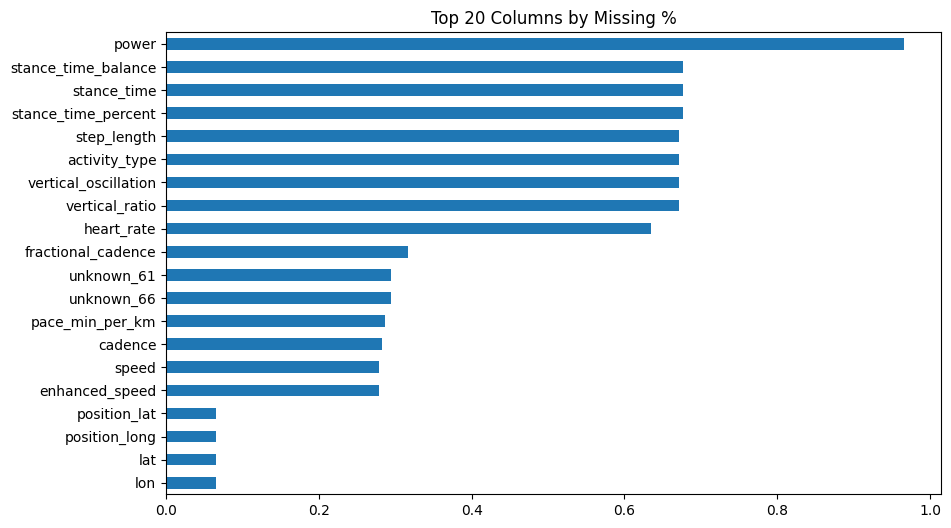

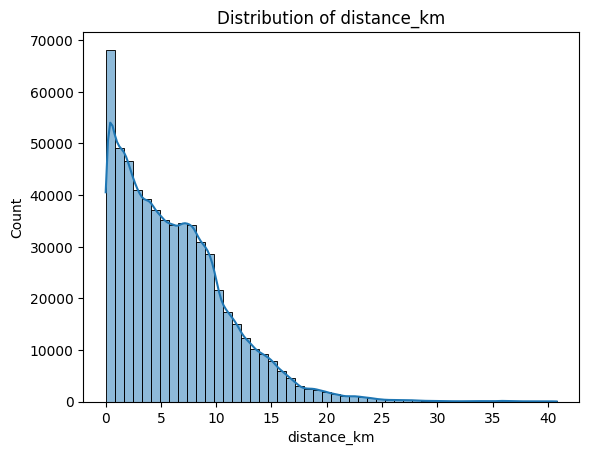

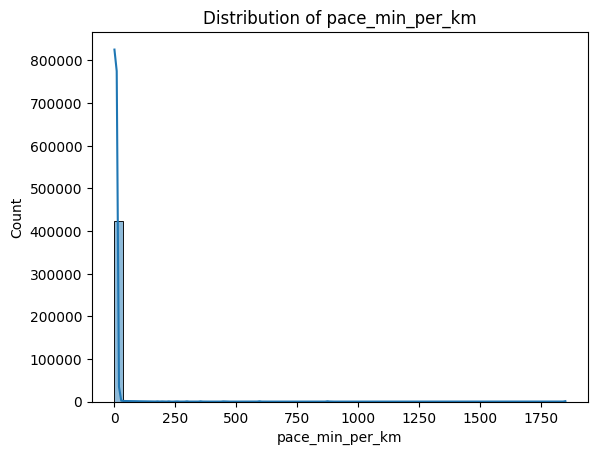

In [4]:
# --- 3.2. Missingness overview ---
missing = df.isna().mean().sort_values(ascending=False)
display(missing)

plt.figure(figsize=(10,6))
missing.head(20).plot(kind='barh', title='Top 20 Columns by Missing %')
plt.gca().invert_yaxis()
plt.show()

# --- 3.3. Quick visual checks ---
sns.histplot(df["distance_km"], bins=50, kde=True)
plt.title("Distribution of distance_km"); plt.show()

sns.histplot(df["pace_min_per_km"], bins=50, kde=True)
plt.title("Distribution of pace_min_per_km"); plt.show()

           records  total_distance_km    avg_pace  cadence_mean     hr_mean  \
count   826.000000         826.000000  730.000000    724.000000  361.000000   
mean    726.449153           9.666908    7.687216     79.669044  135.253172   
std     699.081146           5.823943   17.668057     17.199669   38.665223   
min       1.000000           0.000000    1.818765      0.347059    0.000000   
25%     453.000000           4.999990    4.637405     82.657948  136.196881   
50%     578.000000          10.009195    5.016184     84.190963  146.070922   
75%     779.750000          12.712320    5.826181     85.883804  153.531507   
max    5633.000000          40.796130  389.990563     98.538462  171.965870   

       elevation_max  
count     776.000000  
mean       25.706443  
std        52.033250  
min      -219.600000  
25%         9.400000  
50%        20.800000  
75%        30.000000  
max       825.600000  


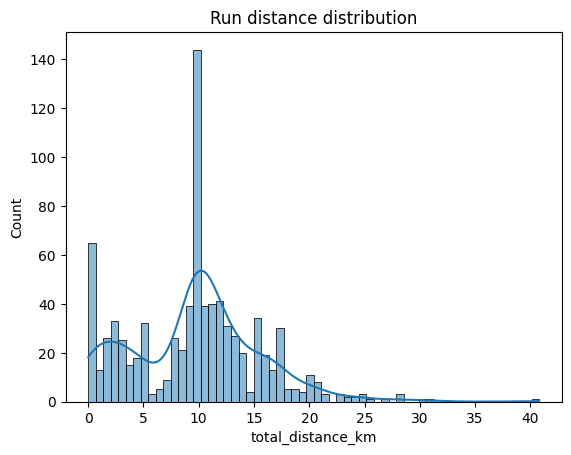

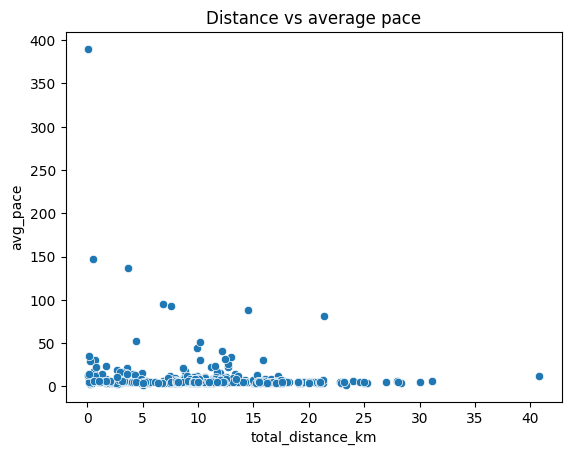

In [5]:
# 3.4. Group by run_id to see completeness per run
run_summary = (
    df.groupby("run_id")
      .agg(
          records=('timestamp', 'count'),
          total_distance_km=('distance_km', 'max'),
          avg_pace=('pace_min_per_km', 'mean'),
          cadence_mean=('cadence', 'mean'),
          hr_mean=('heart_rate', 'mean'),
          elevation_max=('altitude', 'max'),
      )
      .reset_index()
)

print(run_summary.describe())
sns.histplot(run_summary["total_distance_km"], bins=60, kde=True)
plt.title("Run distance distribution"); plt.show()

sns.scatterplot(data=run_summary, x="total_distance_km", y="avg_pace")
plt.title("Distance vs average pace"); plt.show()


In [6]:
#3.5. Load existing Data Quality Manifest for reference ---
from pathlib import Path
import pandas as pd

manifest_path = Path("../data/strava/processed/data_quality_manifest.csv")
manifest = pd.read_csv(manifest_path)
print(f"✅ Loaded manifest with {len(manifest)} columns from: {manifest_path}")
display(manifest.head(15))


✅ Loaded manifest with 17 columns from: ..\data\strava\processed\data_quality_manifest.csv


,column,category,missing_pct,dtype
0,timestamp,keep,0.0,datetime64[ns]
1,distance,keep,0.0,float64
2,enhanced_altitude,keep,0.0,float64
3,altitude,keep,0.0,float64
4,enhanced_speed,keep,0.0,float64
5,speed,keep,0.0,float64
6,unknown_61,drop,0.0,int64
7,unknown_66,drop,0.0,int64
8,cadence,keep,0.0,int64
9,fractional_cadence,keep,0.0,float64


In [7]:
run_summary.to_csv("../data/strava/processed/run_summary_stage1.csv", index=False)
print("✅ Saved per-run summary for next stages.")


✅ Saved per-run summary for next stages.


📊 Visualizing missingness for a 5,000-row sample...


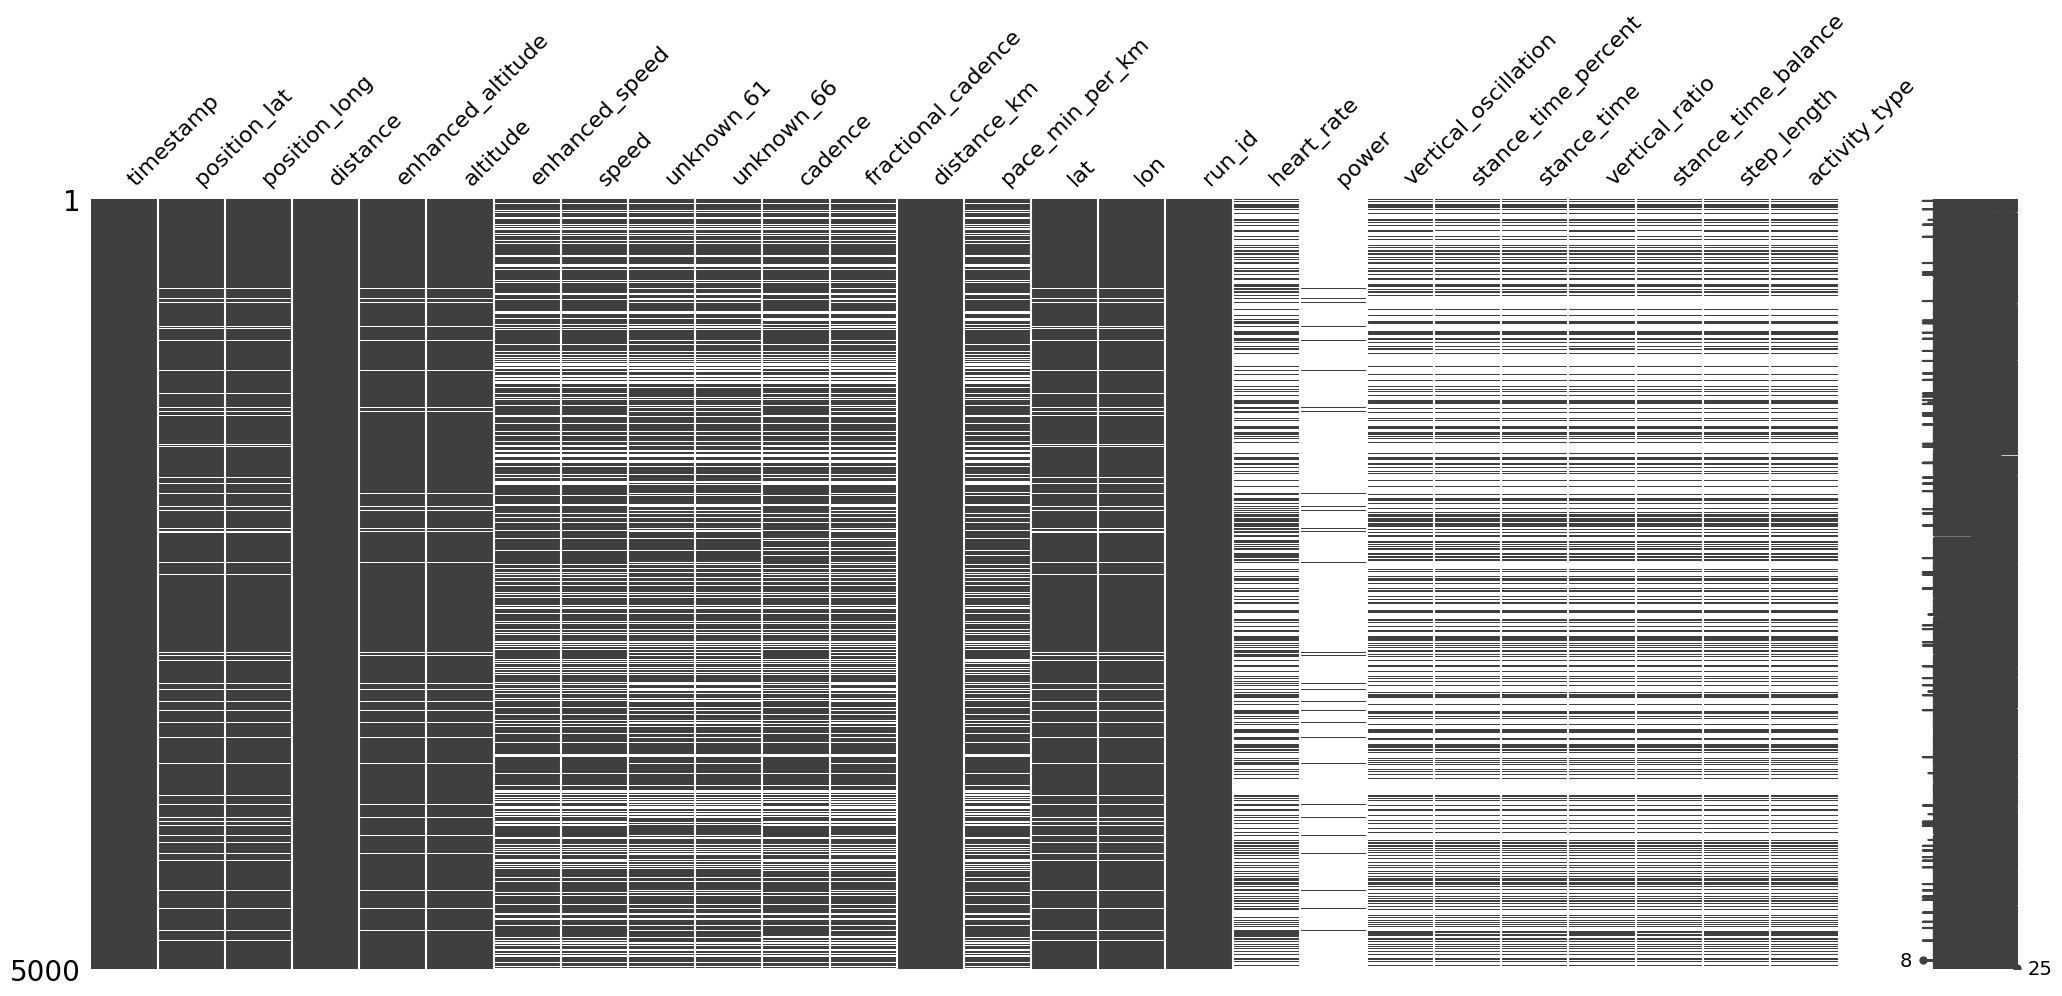

In [8]:
# 3.6. Step 1D – Visual Missingness Heatmap
# ---------------------------------------------------------------------
# Purpose:
# The goal here is to *visually inspect patterns of missing data*.
# While numeric completeness metrics (like the manifest) tell us how
# many values are missing per column, a heatmap helps reveal *where*
# those gaps occur and whether they form patterns — for instance:
#   • Do certain sensors (e.g., heart_rate or altitude) drop out together?
#   • Are there entire runs or time segments with missing data?
#
# We use the `missingno` library because it’s fast and intuitive:
# each column is represented as a vertical stripe of completeness
# across a random sample of rows. White bands = missing data.
#
# Note: We sample 5,000 rows for readability — plotting all ~600k
# rows would be both slow and visually cluttered.
# ---------------------------------------------------------------------

import matplotlib.pyplot as plt

try:
    import missingno as msno
    sample_df = df.sample(5000, random_state=42)
    print(f"📊 Visualizing missingness for a {len(sample_df):,}-row sample...")
    msno.matrix(sample_df)
    plt.show()
except ImportError:
    print("⚠️ The `missingno` package is not installed — skipping missingness visualization.")
